# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try: 
    
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | wetaskiwin
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | vorkuta
Processing Record 5 of Set 1 | mahina
Processing Record 6 of Set 1 | nguigmi
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | oriximina
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | san felipe
Processing Record 13 of Set 1 | kachug
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | zhangjiakou shi xuanhua qu
Processing Record 16 of Set 1 | hengchun
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | san sebastian de la gomera
Processing Record 22 of Set 1 | blackmans bay

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,28.34,75,96,5.41,MV,1706942705
1,wetaskiwin,52.9668,-113.3687,1.12,90,100,2.46,CA,1706942705
2,kerikeri,-35.2268,173.9474,20.51,65,0,1.34,NZ,1706942705
3,vorkuta,67.5000,64.0000,-13.83,88,100,5.20,RU,1706942705
4,mahina,-17.5065,-149.4890,27.87,69,20,1.03,PF,1706942706


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,28.34,75,96,5.41,MV,1706942705
1,wetaskiwin,52.9668,-113.3687,1.12,90,100,2.46,CA,1706942705
2,kerikeri,-35.2268,173.9474,20.51,65,0,1.34,NZ,1706942705
3,vorkuta,67.5000,64.0000,-13.83,88,100,5.20,RU,1706942705
4,mahina,-17.5065,-149.4890,27.87,69,20,1.03,PF,1706942706


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

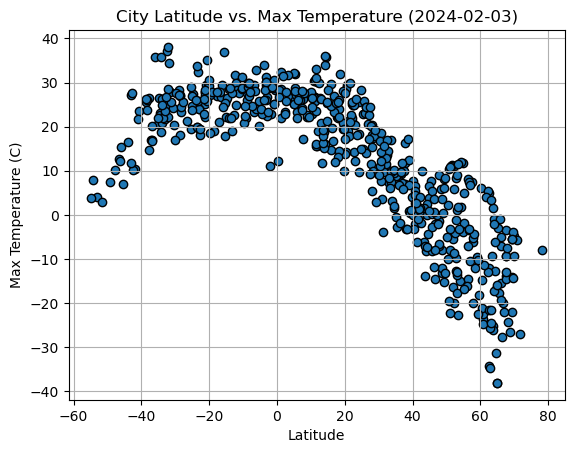

In [8]:
# Build scatter plot for latitude vs. temperature
x_label = city_data_df["Lat"]
y_label = city_data_df["Max Temp"]
plt.scatter(x_label, y_label, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Code here is utilized from Xpert Learning Assistant research to make date information easily
# digestible for average reader (year-month-day date format)
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
city_data_df['Year'] = city_data_df['Date'].dt.year
city_data_df['Month'] = city_data_df['Date'].dt.month
city_data_df['Day'] = city_data_df['Date'].dt.day
city_data_df['Formatted_Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
date = city_data_df["Formatted_Date"][0]
plt.title(f'City Latitude vs. Max Temperature ({date})')
#This
from importlib import reload
reload(plt)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

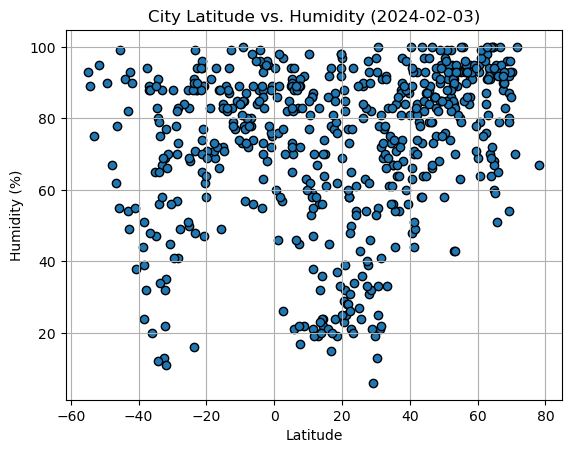

In [9]:
# Build the scatter plots for latitude vs. humidity
x_label = city_data_df["Lat"]
y_label = city_data_df["Humidity"]
plt.scatter(x_label, y_label, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

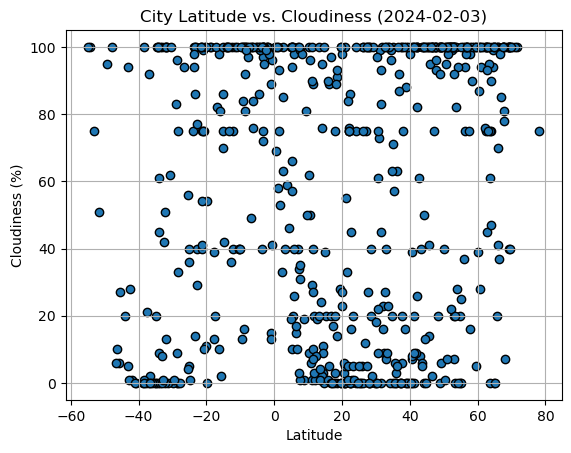

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_label = city_data_df["Lat"]
y_label = city_data_df["Cloudiness"]
plt.scatter(x_label, y_label, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

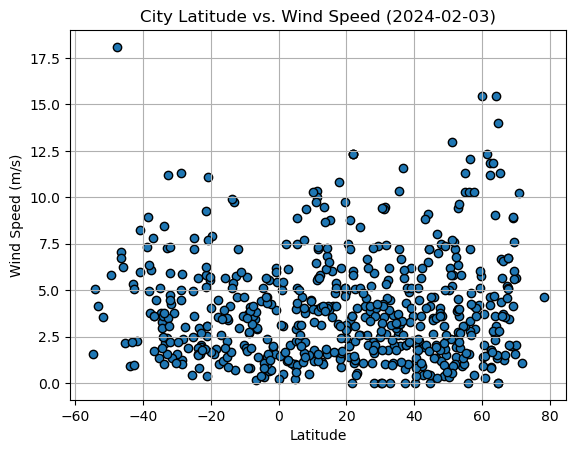

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_label = city_data_df["Lat"]
y_label = city_data_df["Wind Speed"]
plt.scatter(x_label, y_label, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return slope, intercept, rvalue, regress_values, line_eq


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Year,Month,Day,Formatted_Date
City_ID,,,,,,,,,,,,,
1,wetaskiwin,52.9668,-113.3687,1.12,90,100,2.46,CA,2024-02-03 06:45:05,2024,2,3,2024-02-03
3,vorkuta,67.5000,64.0000,-13.83,88,100,5.20,RU,2024-02-03 06:45:05,2024,2,3,2024-02-03
5,nguigmi,14.2495,13.1092,16.07,22,3,6.83,NE,2024-02-03 06:45:06,2024,2,3,2024-02-03
8,georgetown,5.4112,100.3354,31.96,70,20,5.14,MY,2024-02-03 06:44:43,2024,2,3,2024-02-03
9,constantia,44.1833,28.6500,0.39,82,50,6.49,RO,2024-02-03 06:45:07,2024,2,3,2024-02-03


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Year,Month,Day,Formatted_Date
City_ID,,,,,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,28.34,75,96,5.41,MV,2024-02-03 06:45:05,2024,2,3,2024-02-03
2,kerikeri,-35.2268,173.9474,20.51,65,0,1.34,NZ,2024-02-03 06:45:05,2024,2,3,2024-02-03
4,mahina,-17.5065,-149.4890,27.87,69,20,1.03,PF,2024-02-03 06:45:06,2024,2,3,2024-02-03
6,puerto ayora,-0.7393,-90.3518,25.15,89,41,3.94,EC,2024-02-03 06:45:06,2024,2,3,2024-02-03
7,oriximina,-1.7656,-55.8661,22.86,95,100,1.91,BR,2024-02-03 06:45:07,2024,2,3,2024-02-03


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8740002511849901


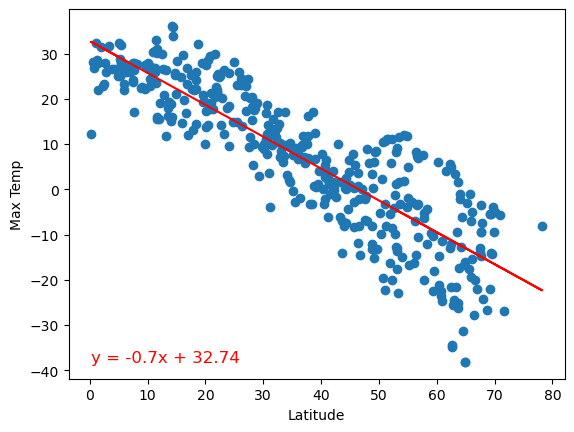

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')



The r-value is: 0.4992310203205531


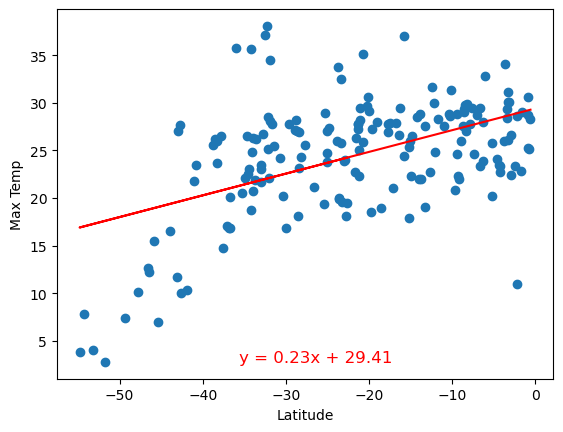

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, ((x_values.max()-35), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 

The relationship in the Northern Hemisphere between latitude and max temperature is very pronounced here; an R value of -0.87 essentially indicates 87% likelihood of a negative trend-line relationship between the variables. This makes a lot of sense, since it is currently winter in the Northern Hemisphere, and the further away you get away from the equator, the colder it generally tends to be. Interestingly, the correlation is not quite as strong in the opposite direction for the Southern Hemisphere. This would be expected, as that hemisphere experiences summer while the north has its winter period, but the collected data only shows not quite 50% likelihood of a positive trend line (warmer as one gets closer to the equator). Admittedly, an R value of nearly 0.50 is still considered a moderate relationship, but I was surprised the trends were not closer in their likelihood, since my instinct would be close to an inverse relationship. It is possible that this could have been affected by the randomness of the data, and so the cities collected from the Southern Hemisphere as a sample population do not correlate as strongly between latitiude and max temperature as the Northern Hemisphere population I collected does. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40666548890610843


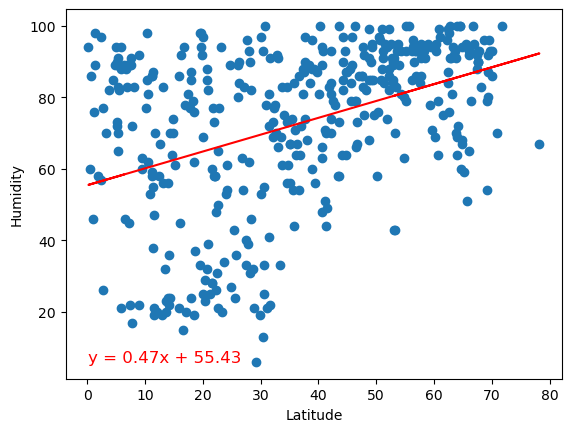

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

The r-value is: 0.31407175535684906


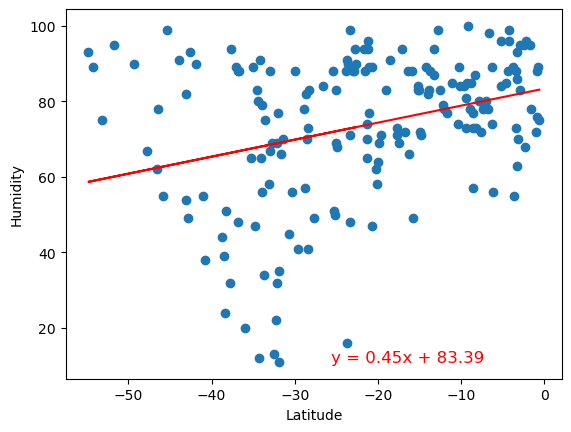

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, ((x_values.max()-25), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 

These graphs are quite interesting, as both hemispheres show a modest positive correlation between humidity and "upward" latitude. This is a bit surprising, as it does not fit my epectation of areas closer to the equator being generally more humid (more jungles and tropical areas exist in areas closer to 0 degrees latitude). To that end, I had expected a negative trend line in the Northern Hemisphere graph. Instead, the further "upward" (imagining moving north on a 2D image of a globe from bottom to top) seems to correlate at least a little bit with more humidity. This would seem to imply that as you get north of the equator, humidity tends to increase further still as you reach toward the North Pole. I am not convinced that this correlation is strong enough to be considered strong evidence for this idea, though it is certainly interesting to think about! I also wonder if this is perhaps affected by seasonality or time of year; winter sometimes conincides with rainy seasons, which may have increased the general humidity further north of the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30995245984387143


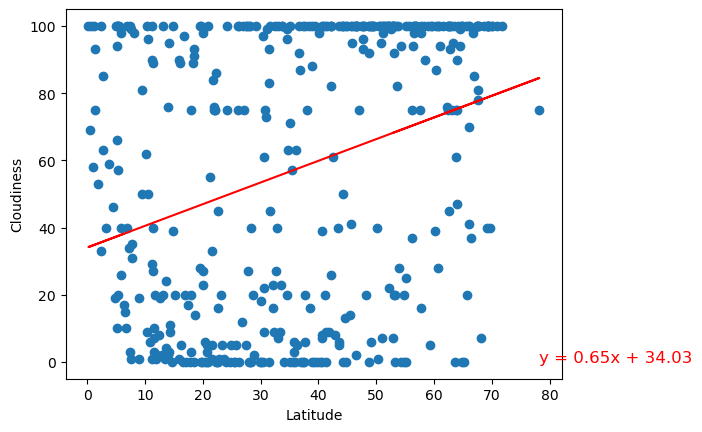

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max(), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

The r-value is: 0.42163194617723404


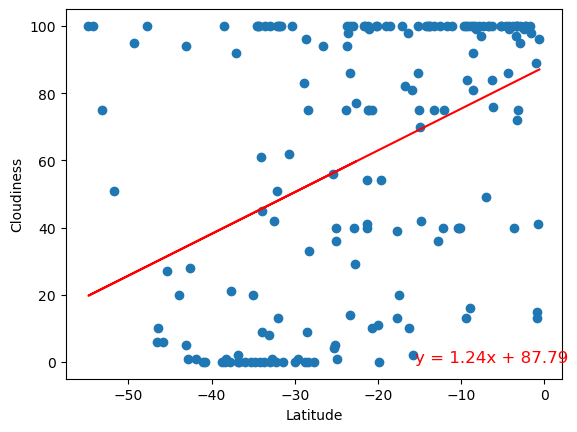

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, ((x_values.max()-15), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 

I believe the graphs comparing cloudiness correspond decently well with the graphs discussed regarding humidity; this makes sense to me as more humidity often means increased chance of precipitation, which clearly increases the likelihood of clouds being present. I also think this explains why the correlation trend lines are very similar to the humidity graphs - in fact, the R values are extremely similar, and both Northern Hemisphere graphs buck my expectations in the same manner. This may also point to the fact that although general weather patterns for geographical regions are fairly predictable, sampling the weather at any given specific point in time can yield unusual results due to storm systems, jetstream changes, etc.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07494110934328867


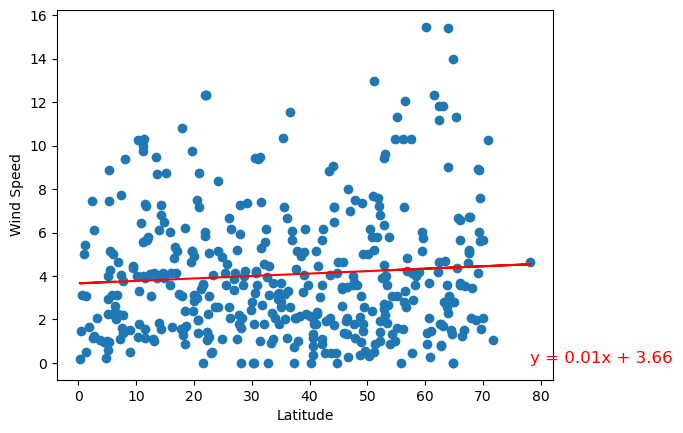

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max(), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

The r-value is: -0.2279747449770419


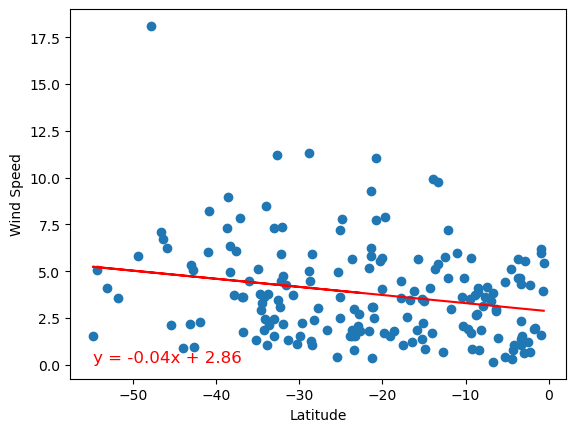

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, intercept, rvalue, regress_values, line_eq = lin_reg(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")
print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 

In the aggregate, the wind speed graphs would seem to suggest that wind speeds tend to slow a bit when nearing the equator, with average wind speeds increasing the further you get to either the North or South Pole. I was surpised to see this was the case, as my gut instinct was to associate weather events such as hurricanes and tropical storms, or other windy events, as closer to the equator. The R correlation values for both graphs are quite low (0.07 and -0.22, respectively), further calling into question this relationship between latitude and wind speed, After doing some supplementary research, however, it does appear that there is some scientific reason for wind speed to begin increasing further from the equator, called the Coriolis Effect. Since the surface of Earth moves fastest at the Equator, air moving toward the poles simultaenously maintains eastward momentum. Wind bands are strongest where the change in temperature is greatest. These have been identified as occurring around the +/- 30 degrees latitude, as well as somewhere between +/- 50/60 degrees latitude. While the sample data collected does not reflect this effect to a very strong degree, it does still seem to at least partially appear.